### Load and explore dataset

In [1]:
import pandas as pd
import numpy as np
df=pd.read_csv('knowledge.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 258 entries, 0 to 257
Data columns (total 6 columns):
STG    258 non-null float64
SCG    258 non-null float64
STR    258 non-null float64
LPR    258 non-null float64
PEG    258 non-null float64
UNS    258 non-null object
dtypes: float64(5), object(1)
memory usage: 12.2+ KB


1. STG (The degree of study time for goal object materails), (input value)
2. SCG (The degree of repetition number of user for goal object materails) (input value)
3. STR (The degree of study time of user for related objects with goal object) (input value)
4. LPR (The exam performance of user for related objects with goal object) (input value)
5. PEG (The exam performance of user for goal objects) (input value)
6. UNS (The knowledge level of user) (target value)

Very Low: 50
Low:129
Middle: 122
High 130

### Date preparation 

In [2]:
df['UNS'].unique() #check attributes for the column of UNS

array(['Very Low', 'Low', 'High', 'Middle', 'very_low'], dtype=object)

As we can see, we have 'Very Low' and 'very_low' those two values in column "UNS", which stands for the same meaning. So, for our convenience, we will change those three values to 'Low'

In [3]:
df['UNS']=df['UNS'].replace(['Very Low','very_low'],'Low')
# low was assgined to cluster 1, high was in cluster 2, middle was in cluster 0
df['UNS']=df['UNS'].replace({'Low':1,'High':2,'Middle':0})
df.head()

,STG,SCG,STR,LPR,PEG,UNS
0,0.00,0.10,0.50,0.26,0.05,1
1,0.05,0.05,0.55,0.60,0.14,1
2,0.08,0.18,0.63,0.60,0.85,2
3,0.20,0.20,0.68,0.67,0.85,2
4,0.22,0.22,0.90,0.30,0.90,2


In [4]:
#read column 0-4 data
knowledge=df.iloc[:,[0,1,2,3,4]]
knowledge.head()

,STG,SCG,STR,LPR,PEG
0,0.00,0.10,0.50,0.26,0.05
1,0.05,0.05,0.55,0.60,0.14
2,0.08,0.18,0.63,0.60,0.85
3,0.20,0.20,0.68,0.67,0.85
4,0.22,0.22,0.90,0.30,0.90


### Dataset visualization 

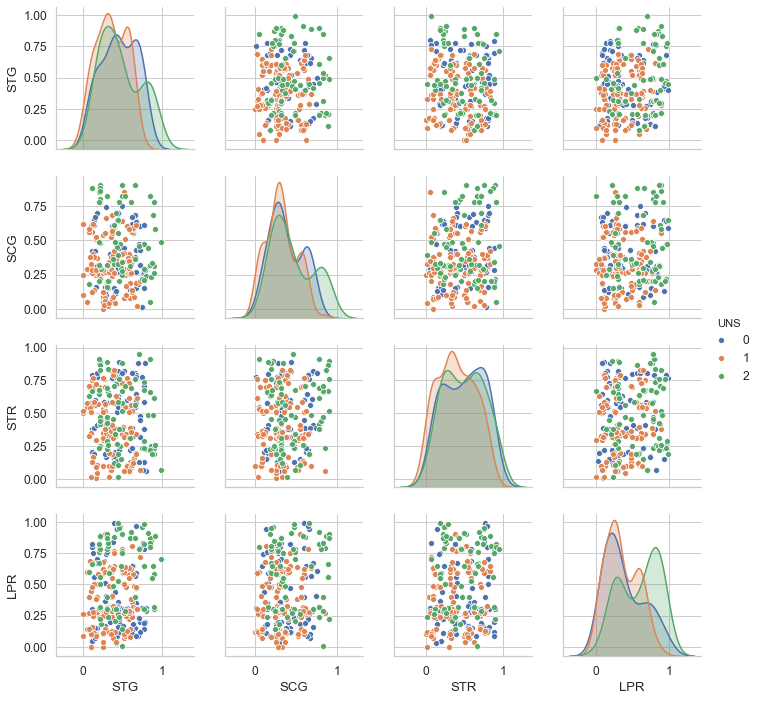

In [5]:
%matplotlib inline
import seaborn as sns

sns.set(font_scale=1.1)
sns.set_style('whitegrid')

grid = sns.pairplot(data=df, vars=df.columns[0:4], hue='UNS')

From the pairplot above, we did not see that the results are diverged enough. However, we can still try clustering.

### Create a k-means estimator and fit the model

In [6]:
from sklearn.cluster import KMeans
# from the pair graph above, we couldn't see obviouse division. 
#However, we are expecting to see three clusters: low, middle, and high. So, we picked 3.
kmeans = KMeans(n_clusters=3, random_state=11)# find three clusters

kmeans.fit(knowledge)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=11, tol=0.0001, verbose=0)

### Compare the k-means labels to the knowledege dataset’s target values

In [7]:
knowledge_expected=df.UNS
knowledge_expected=knowledge_expected.values
knowledge_expected[:50]
print('knowledage_predicted',kmeans.labels_[0:50])
print(f'knowledge_expected = {knowledge_expected[:50]}')

knowledage_predicted [1 1 2 2 0 1 1 1 2 1 0 1 0 1 0 1 2 1 1 0 0 1 1 1 0 1 1 2 2 1 1 1 2 2 1 0 1
 2 0 0 1 1 2 1 0 1 2 2 2 1]
knowledge_expected = [1 1 2 2 2 1 0 1 2 1 0 1 2 0 2 1 2 1 1 0 2 1 1 1 0 1 1 0 0 1 1 1 0 2 1 0 1
 2 0 0 1 1 2 1 2 1 0 0 2 1]


### Wrong cluster arrangement

In [8]:
wrong = [ (pred, exp) 
          for (pred, exp) in zip(kmeans.labels_, knowledge_expected) 
          if pred != exp
        ]

print('Wrong predictions:')
print(wrong)
print(f'Prediction accuracy: {1-len(wrong)/len(knowledge_expected):3.2}')

Wrong predictions:
[(0, 2), (1, 0), (0, 2), (1, 0), (0, 2), (0, 2), (2, 0), (2, 0), (2, 0), (0, 2), (2, 0), (2, 0), (0, 2), (2, 0), (1, 0), (0, 2), (2, 0), (0, 2), (0, 2), (1, 0), (0, 2), (1, 0), (0, 2), (2, 1), (1, 0), (2, 0), (2, 0), (2, 0), (0, 2), (2, 0), (0, 2), (0, 2), (0, 2), (0, 1), (2, 0), (2, 0), (0, 2), (2, 0), (0, 2), (0, 2), (0, 2), (0, 2), (0, 2), (0, 2), (0, 2), (0, 2), (2, 1), (0, 2), (0, 2), (2, 0), (2, 0), (2, 0), (0, 2), (0, 2), (1, 0), (2, 0), (0, 2), (2, 0)]
Prediction accuracy: 0.78


### Dimensionality reduction with Principal Component Analysis (PCA)

In [9]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2, random_state=11)  # reduce to two components
pca.fit(knowledge)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=11,
    svd_solver='auto', tol=0.0, whiten=False)

In [10]:
knowledge_pca = pca.transform(knowledge)
knowledge_pca.shape

(258, 2)

In [11]:
knowledge_pca_df = pd.DataFrame(knowledge_pca, 
                           columns=['Component 1', 'Component 2'])
knowledge_pca_df['UNS'] = df['UNS']
knowledge_pca_df.head()

,Component 1,Component 2,UNS
0,-0.549567,-0.139446,1
1,-0.300367,-0.370901,1
2,0.262561,0.032168,2
3,0.350831,-0.015021,2
4,0.285540,0.319339,2


### Visualize the reduced data

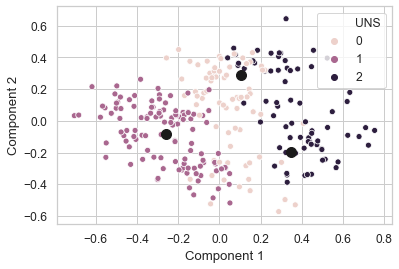

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

axes = sns.scatterplot(data=knowledge_pca_df, hue='UNS', legend='brief', 
                       x='Component 1', y='Component 2') 

knowledge_centers = pca.transform(kmeans.cluster_centers_)
dots = plt.scatter(knowledge_centers[:,0], knowledge_centers[:,1], s=100, c='k')

From the scatter plot above, we can see the division of those three clusters, which means that clustering works pretty well for this case. If we have more data points, the result should be much better.

###  Use PCA reduce to 3-dimensions

In [13]:
pca_3d = PCA(n_components=3, random_state=11)  # reduce to two components
pca_3d.fit(knowledge)

PCA(copy=True, iterated_power='auto', n_components=3, random_state=11,
    svd_solver='auto', tol=0.0, whiten=False)

In [14]:
knowledge_pca_3d = pca_3d.transform(knowledge)
knowledge_pca_3d.shape

(258, 3)

In [15]:
knowledge_pca_df_3d = pd.DataFrame(knowledge_pca_3d, 
                           columns=['Component 1', 'Component 2','Component 3'])
knowledge_pca_df_3d['UNS'] = df['UNS']
knowledge_pca_df_3d.head()

,Component 1,Component 2,Component 3,UNS
0,-0.549567,-0.139446,-0.322551,1
1,-0.300367,-0.370901,-0.263444,1
2,0.262561,0.032168,-0.219370,2
3,0.350831,-0.015021,-0.186031,2
4,0.285540,0.319339,-0.403205,2


### Visualize 3-Dimensional reduced data

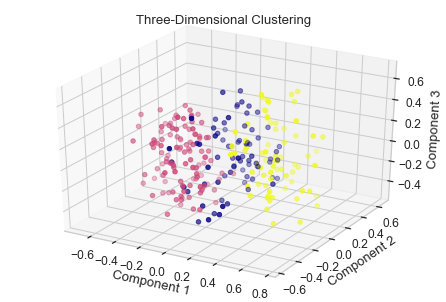

In [16]:
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D

fig = pyplot.figure()
ax = Axes3D(fig)
ax.scatter(knowledge_pca_df_3d['Component 1'],knowledge_pca_df_3d['Component 2'],\
           knowledge_pca_df_3d['Component 3'],c=knowledge_pca_df_3d['UNS'],marker='o',cmap='plasma')
pyplot.xlabel('Component 1')
pyplot.ylabel('Component 2')
ax.set_zlabel('Component 3')
pyplot.title('Three-Dimensional Clustering')
pyplot.show()
